# 习题

# 3.3

>问：编程实现对率回归，并给出西瓜数据集3.0α上的结果

西瓜数据集3.0α：

| 编号 | 密度  | 含糖率 | 好瓜 |
| :--: | :---: | :----: | :--: |
|  1   | 0.697 | 0.460  |  是  |
|  2   | 0.774 | 0.376  |  是  |
|  3   | 0.634 | 0.264  |  是  |
|  4   | 0.608 | 0.318  |  是  |
|  5   | 0.556 | 0.215  |  是  |
|  6   | 0.403 | 0.237  |  是  |
|  7   | 0.481 | 0.149  |  是  |
|  8   | 0.437 | 0.211  |  是  |
|  9   | 0.666 | 0.091  |  否  |
|  10  | 0.243 | 0.0267 |  否  |
|  11  | 0.245 | 0.057  |  否  |
|  12  | 0.343 | 0.099  |  否  |
|  13  | 0.639 | 0.161  |  否  |
|  14  | 0.657 | 0.198  |  否  |
|  15  | 0.36  |  0.37  |  否  |
|  16  | 0.593 | 0.042  |  否  |
|  17  | 0.719 | 0.103  |  否  |



# sklearn method

## linear regression（线性回归）

用sklearn实现线性回归（linear regression）

数据集采用人工生成的办法，一条直线上的随机数据加上一点噪声

In [209]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

# 固定种子，方便结果复现
np.random.seed(77)

展示生成的数据

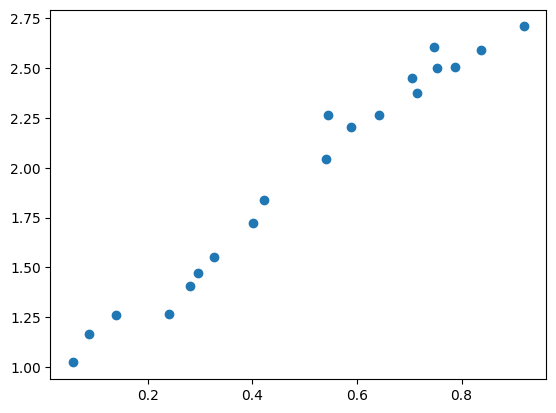

In [210]:
data_size = 20
x = np.random.rand(data_size)
func = lambda x: 2*x + 1
y = func(x) + np.random.randn(data_size)*0.1

plt.scatter(x, y)
plt.show()

用sklean库实现线性回归，画出拟合曲线

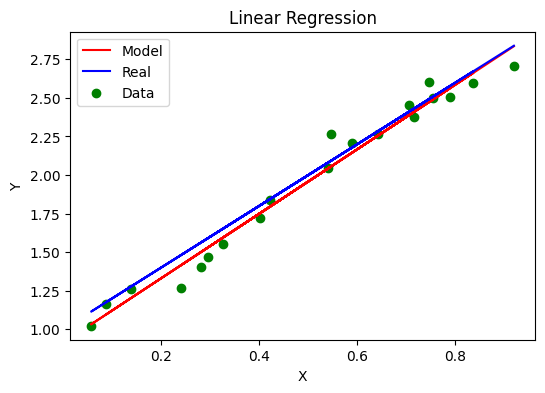

In [213]:
from sklearn.linear_model import LinearRegression

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

linear_model = LinearRegression()
linear_model.fit(x, y)
plt.figure(figsize=(6, 4))
plt.plot(x, linear_model.predict(x), color='red', label='Model')
plt.plot(x, func(x), color='blue', label='Real')
plt.scatter(x, y, color='green', label='Data')
plt.legend(loc='best')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


## polynomial regression（多项式回归）

对于多项式回归，我们可以用多项式函数来拟合数据，即用$y=a_0+a_1x+a_2x^2+...+a_nx^n$来拟合数据。

假设我们有一组数据$(x_i,y_i)$，其中$x_i$是输入变量，$y_i$是输出变量。我们希望找到一组多项式函数$y=a_0+a_1x+a_2x^2+...+a_nx^n$，使得$y_i$与$y$的误差最小。

理论上，多项式回归可以得到泰勒展开的前n项。

我们制造一组数据，然后对比不同幂次的多项式回归结果。

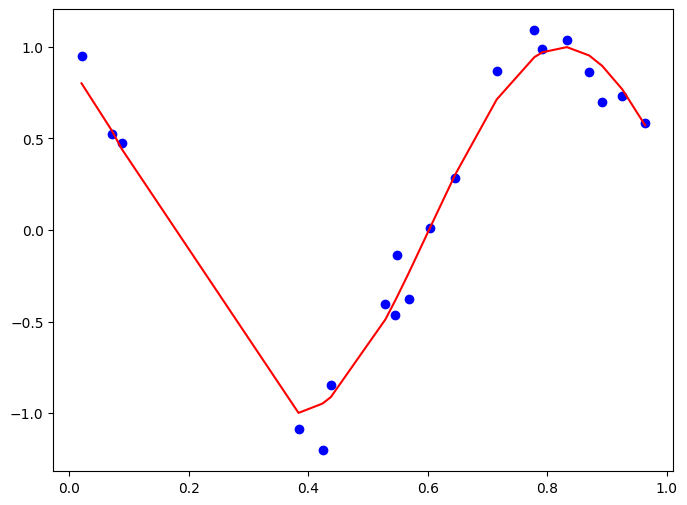

In [16]:
import numpy as np
import matplotlib.pyplot as plt


# Generate data
np.random.seed(0)
X = np.random.rand(20, 1)
X.sort(axis=0)
func = lambda x: np.cos(7 * x + 0.5)
y = func(X) + np.random.randn(20, 1)*0.1

# Plot data
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue')
plt.plot(X, func(X), color='red')
plt.show()

接下来用不同的幂次进行拟合，并用cross validation（交叉验证）来评估模型的好坏。

Degree 1: MSE score = -1.6204846544172304
Degree 3: MSE score = -10361536.091646288
Degree 10: MSE score = -1.4570301525405676e+19


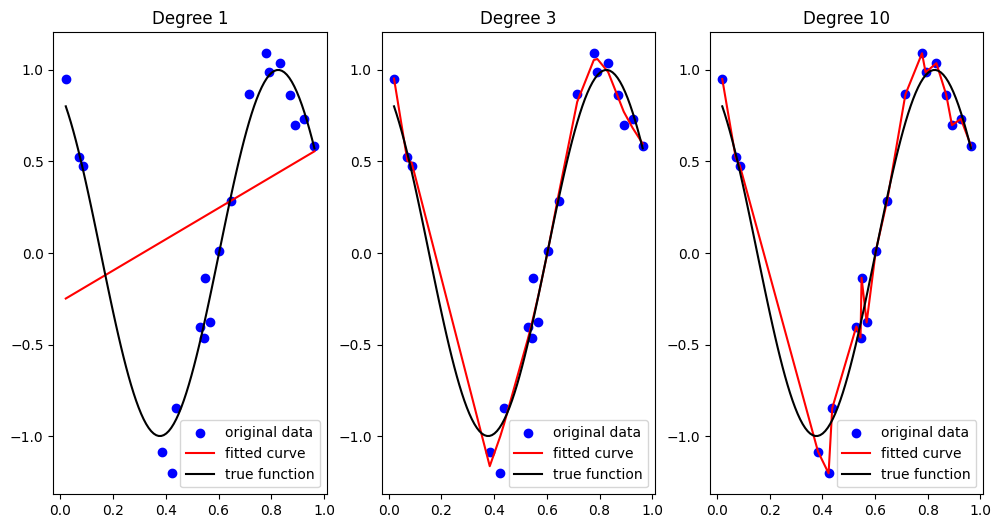

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score


X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

plt.figure(figsize=(12, 6))
for i, degree in enumerate([1,3,10]):
    features = PolynomialFeatures(degree=degree)
    linear_model = LinearRegression()
    pipeline = Pipeline([('features', features), ('linear_model', linear_model)])
    # preprocess the data
    X_poly = features.fit_transform(X)
    scaler = StandardScaler()
    X_poly_scaled = scaler.fit_transform(X_poly)
    # fit the model
    pipeline.fit(X_poly_scaled, y)
    # predict the output
    y_pred = pipeline.predict(X_poly_scaled)
    # plot the results
    subplot = plt.subplot(1, 3, i+1)
    plt.scatter(X, y, color='blue', label='original data')
    plt.plot(X, y_pred, color='red', label='fitted curve')
    X_linspace = np.linspace(X.min(), X.max(), 100)
    plt.plot(X_linspace, func(X_linspace), color='black', label='true function')
    plt.legend(loc='best')
    plt.title(f'Degree {degree}')
    # 3-cross validation
    scores = cross_val_score(pipeline, X_poly_scaled, y, cv=5,
                             scoring = 'neg_mean_squared_error')
    print(f'Degree {degree}: MSE score = {scores.mean()}')

plt.show()

获取MNIST数据集，我下载到了dataset目录里

In [ ]:
# from sklearn.datasets import fetch_openml
# mnist = fetch_openml('mnist_784', version=1)
# X, y = mnist["data"], mnist["target"]
import scipy.io.arff as arff
import os

data, meta = arff.loadarff(os.path.join(os.getcwd(),
                                   'dataset', 'mnist_784.arff'))
data

array([(0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,   0.,   0.,   0.,  0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,  0.,  0.,   0.,   0.,   0.,   0.,   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,  0.,  0.,   0.,   0.,   0.,   0.,   0.,   0.,  0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,  0.,  3.,  18.,  18.,  18., 126., 136., 175.,  26., 166., 255., 247., 127., 0., 0., 0., 0., 0., 0., 0., 0.,  0.,  0., 0., 0., 30., 36.,  94., 154., 170., 253., 253., 253., 253., 253., 225., 172., 253., 242., 195., 64., 0., 0., 0., 0., 0., 0., 0., 0.,   0.,   0., 0., 49., 238., 253., 253., 253., 253., 253., 253., 253., 253., 251., 93.,  82.,  82.,  56.,

In [ ]:
mnist = pd.DataFrame(data)
mnist

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'5'
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'4'
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1'
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'9'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'2'
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'3'
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'4'
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'5'


In [ ]:
mnist.loc[4, 'class']

b'9'

In [ ]:
cc = np.array([[1, 2, 3, 4, 5],[3,4,5,6,7]])
cc.dtype

dtype('int64')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# cc = cc.reshape(-1, 1)
cc = scaler.fit_transform(cc.astype(np.float32))
cc

array([[-1., -1., -1., -1., -1.],
       [ 1.,  1.,  1.,  1.,  1.]], dtype=float32)

In [ ]:
print(cc.var(axis=0))

[1. 1. 1. 1. 1.]
